The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


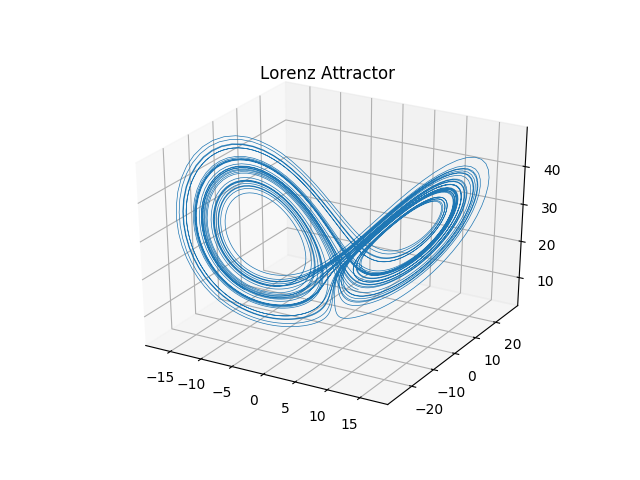

In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

def lorenz(xyz, *, s=5, r=28, b=2.667):
    _, x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([1, x_dot, y_dot, z_dot])

dt = 0.01
num_steps = 30000

xyzs = np.empty((num_steps + 1, 4))  # Need one more for the initial values
xyzs[0] = (0, 0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

xyz_coords = np.empty((num_steps+1, 3))
for i in range(num_steps+1):
    xyz_coords[i] = xyzs[i][1:]

#print(xyz_coords)
    
ax.plot(*xyz_coords[5000:10000].T, lw=0.5)
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

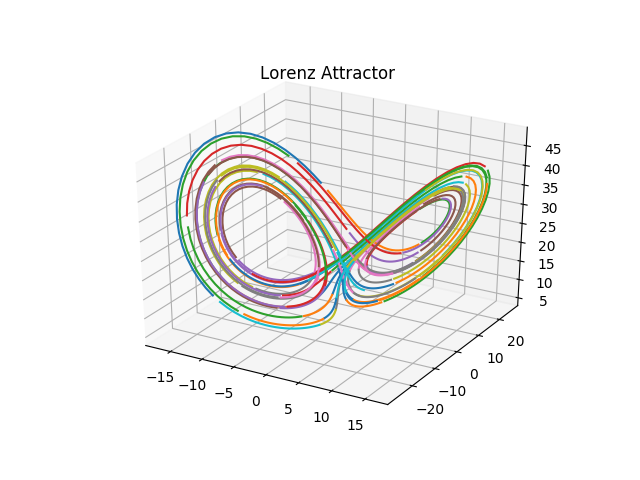

In [7]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

xyzs = xyzs[7500:10000]
xyz_coords = xyz_coords[7500:10000]
num_steps = len(xyzs)
#num_steps=num_steps-5000

traj_list = []
#num_steps=250
length = 25
i = 0
while i+length<num_steps:
    traj_list.append(xyzs[i:i+length])
    i = i+int(1*length)

ax = plt.figure().add_subplot(projection='3d')

for i in range(0,100):
    ax.plot(*xyz_coords[i*length:(i+1)*length].T)
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [8]:
print('Trajectory shape before embedding:')
print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))

def embedding(xyz):
    return np.hstack((xyz, np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 2*np.ones(xyz.shape)), 
                      np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 3*np.ones(xyz.shape))))

                     
A = np.random.randn(1, 9)
print(A)
A = [[ 0.36956572, -0.56530295, -0.08434743, -1.27003323, -0.34177907, -1.31266121, 0.08831102,  0.36965217,  0.83838318],
 [-1.46928237,  2.41508164, 2.59267909, -.69745742,-1.63944946,-0.05751269, -0.12781221,  0.19239181, 1.40852378],
 [ 0.18748471, -0.53227022,0.66637963, 0.92152638, 0.37343253, -0.14106446, -1.64379584, -0.58575294,  0.27286669]]
A = [[ 0.25844399,  0.47324771, -1.80827048,  1.94821934, -0.54394012, -0.62683173,
  -1.99868916,  0.17727686, -0.21442314]]
def embed_and_project(xyz, project=True):
    if project == True:
        return np.matmul(A, embedding(xyz).T).T
    else:
        return embedding(xyz)

project = True
    
tlist_new = [0.0 for i in range(len(traj_list))]
for i in range(len(traj_list)):
    tlist_new[i] = np.hstack((np.reshape(traj_list[i][:,0],(traj_list[i][:,0].shape[0],1)), embed_and_project(traj_list[i][:,1:], project)))
traj_list = tlist_new
if project == True:
    print('Trajectory shape after embedding and projecting:')
else:
    print('Trajectory shape after embedding:')

print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))

Trajectory shape before embedding:
(25, 4)
[[ 0.801905   -1.1415333   0.72241385 -1.3798173   1.76642333  0.67751875
   0.79871783 -0.57632104  0.57556142]]
Trajectory shape after embedding and projecting:
2


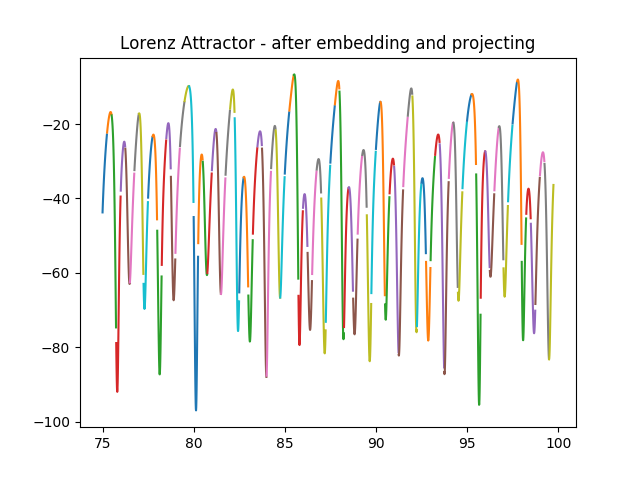

In [10]:
if project == True and traj_list[0].shape[1] > 2:
    ax = plt.figure().add_subplot(projection='3d')
    for i in range(0,len(traj_list)):
        ax.plot(*traj_list[i].T)
    ax.set_title("Lorenz Attractor - after embedding and projecting")
    plt.show()
    
elif project == True:
    ax = plt.figure().add_subplot()
    for i in range(0,len(traj_list)):
        ax.plot(*traj_list[i].T)
    ax.set_title("Lorenz Attractor - after embedding and projecting")
    plt.show()

In [11]:
t2s = Traj2Sim()

load=False

if project == False:
    if load == False:
        t2s.set_trajectories(traj_list)
        t2s.compute_mssd(verbose=False)
        t2s.save_bifilt(filename='lorenz_hd.npy')
    if load == True:
        t2s.load_bifilt(filename='lorenz_hd.npy')

if project == True:
    if load == False:
        t2s.set_trajectories(traj_list)
        t2s.compute_mssd(verbose=False)
        t2s.save_bifilt(filename='lorenz_hdto1d.npy')
    if load == True:
        t2s.load_bifilt(filename='lorenz_hdto1d.npy')

|████████████████████████████████████████| 4851/4851 [100%] in 2:27.8 (32.8/s, eta: 1:50)                                                               (34.1/s, eta:▄▂▂ 154/4851 [3%] in 5s (34.2/s, eta:302/4851 [6%] in 9s (33.6/s, eta: 349/4851 [7%] in 10s (33.8/s, etain 11s (33.7/s, eta384/4851 [8%] in 11s (33.4/s, eta in 21s (32.2/s, et(32.2/s, etin 22s (32.2/s, et▂▂▄ 812/4851 [17%] in 25s (32.2/s, et (32.2/s, et 892/4851 [18%] in 28s (32.2/s, et928/4851 [19%] in 29s (32.1/s, et1046/4851 [22%] in 33s (32.0/s, e1055/4851 [22%] in 33s (32.0/s, e 1079/4851 [22%] in 34s (32.0/s, ein 36s (32.0/s, e1196/4851 [25%] in 37s (32.0/s, e                                             in 41s (32.1 1359/4851 [28%] in 42s (32.2 ▂▄▆ 1468/4851 [30%] in 45s (32.4 (32.4 1521/4851 [31%] in 47s (32.4(32.5 (32.5in 53s (32.8 1746/4851 [36%] in 53s (32.8 1753/4851 [36%] in 54s (32.8▅▇▇ 1796/4851 [37%] in 55s (32.8 1901/4851 [39%] in 58s (32.7▂▂▄ 1921/4851 [40%] in 59s (32.7(32. 2180/4851 [45%] in 1:07 (32.▄▆█ 

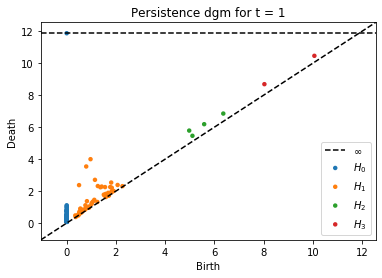

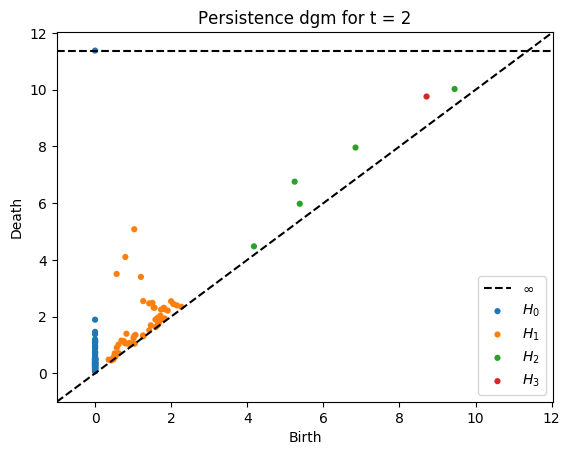

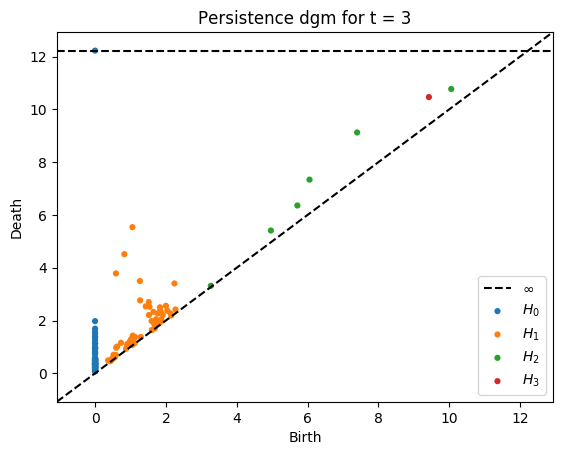

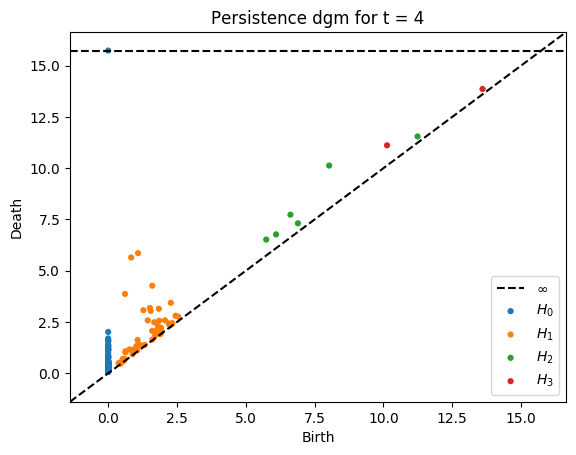

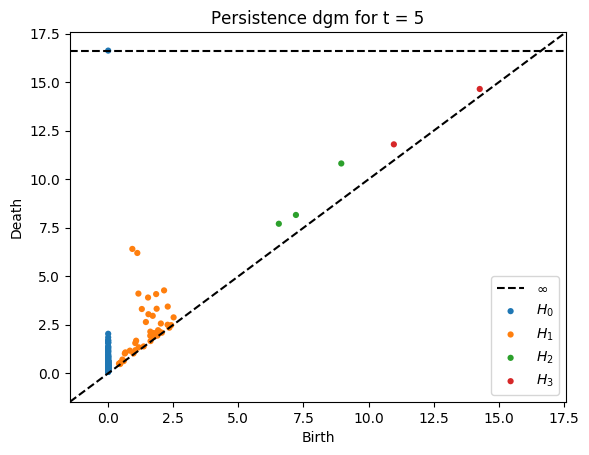

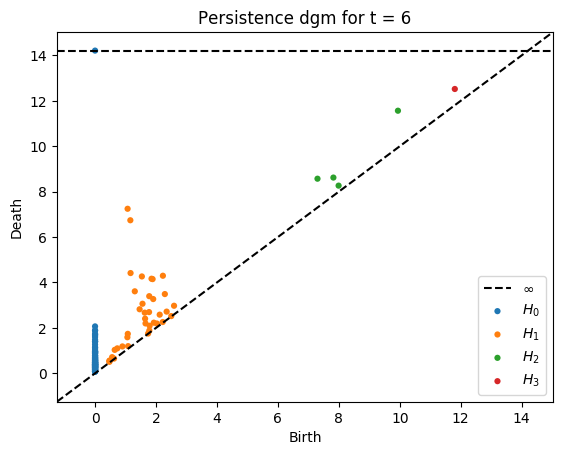

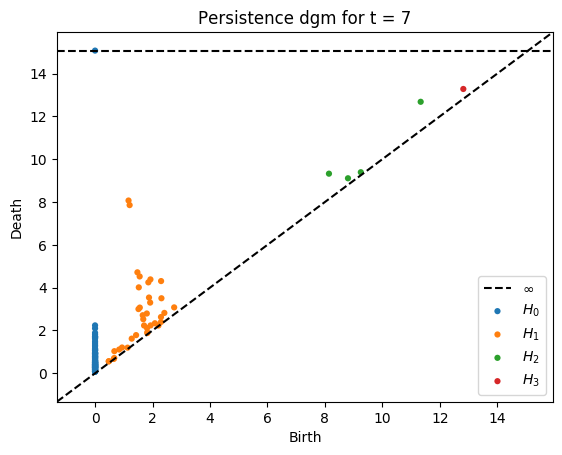

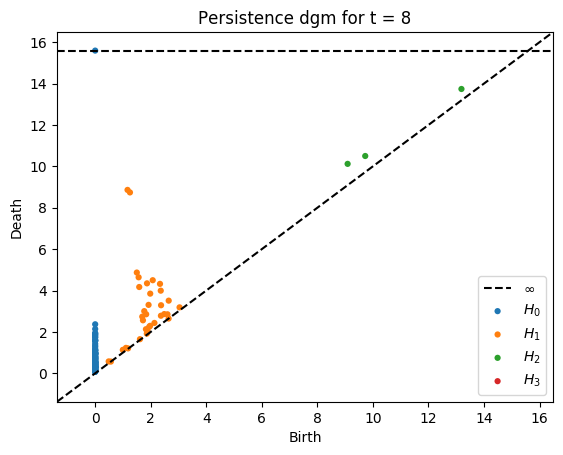

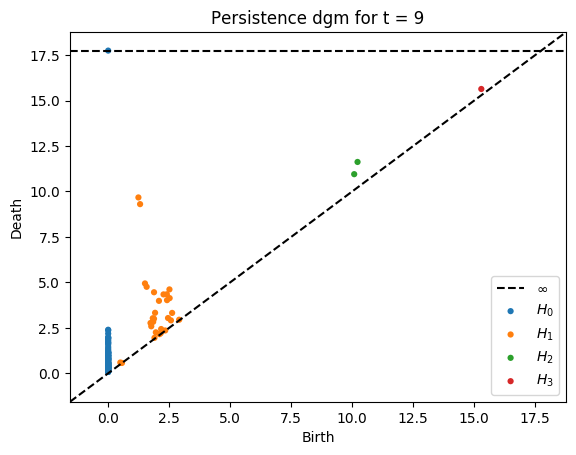

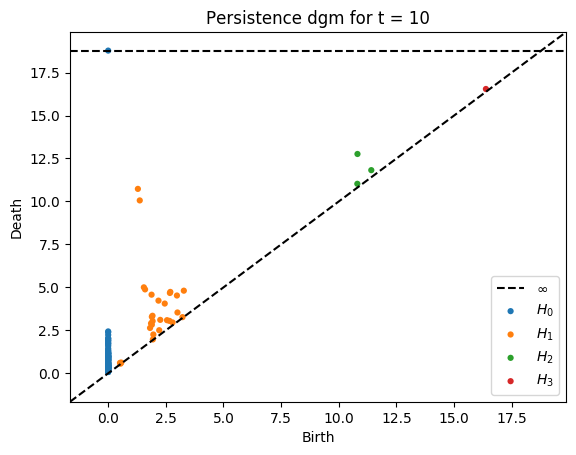

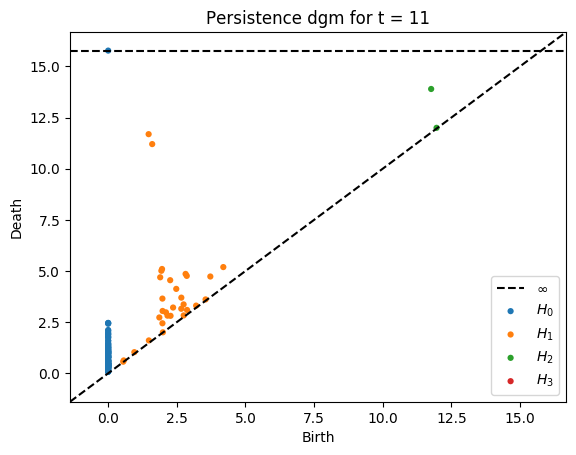

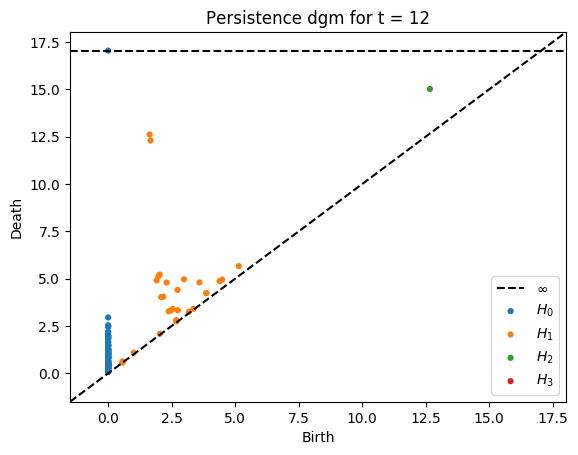

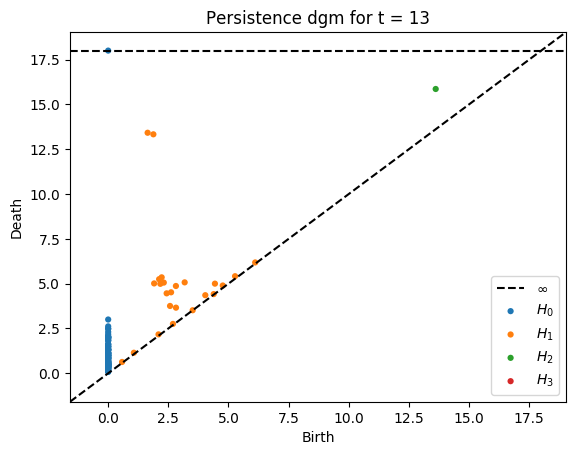

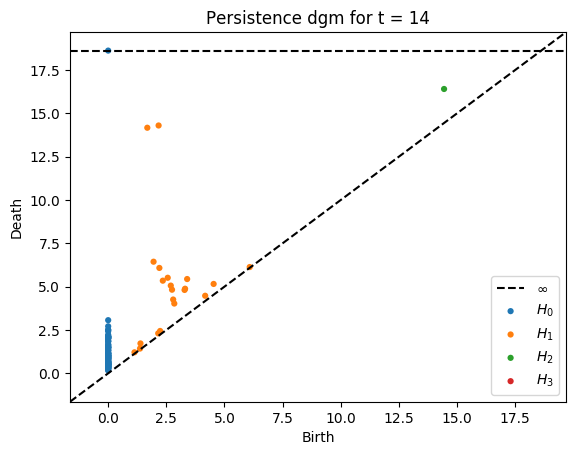

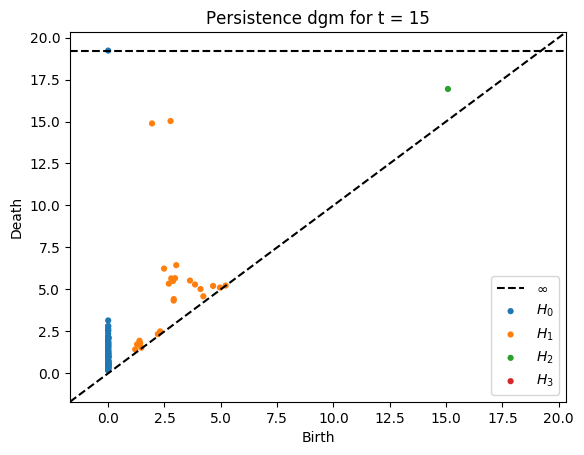

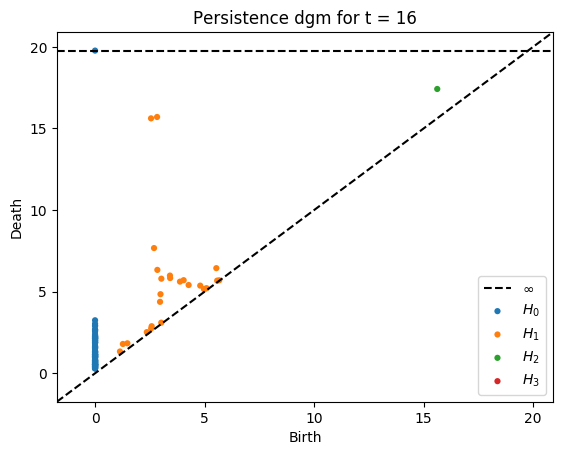

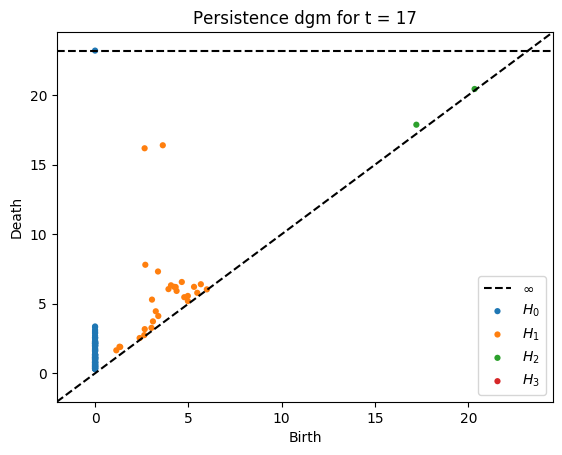

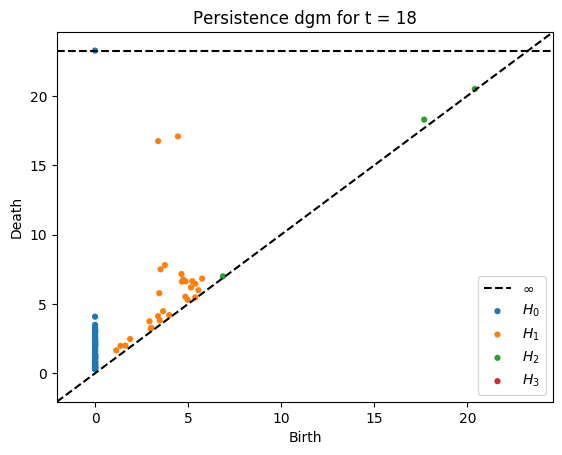

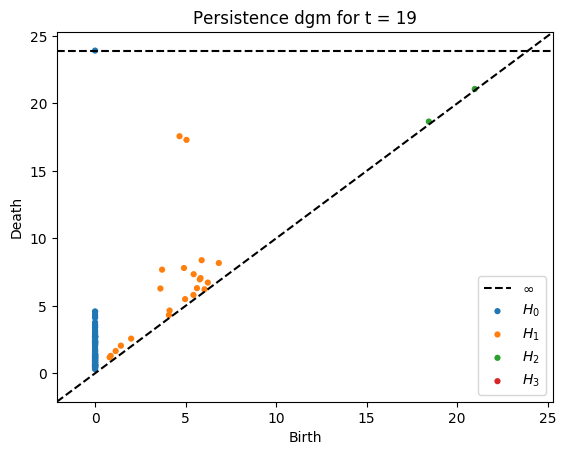

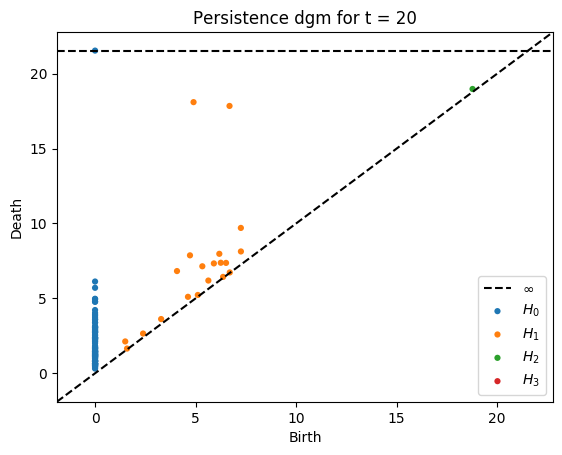

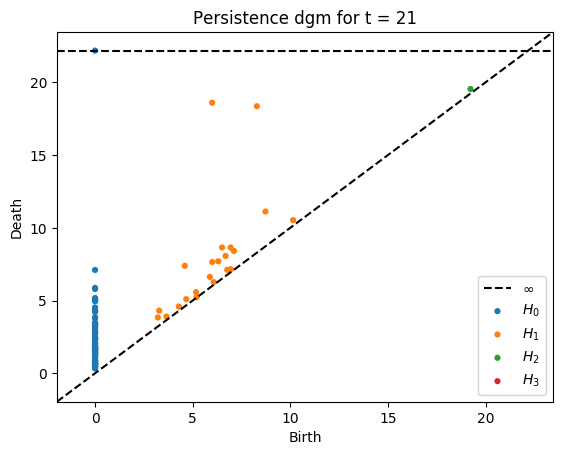

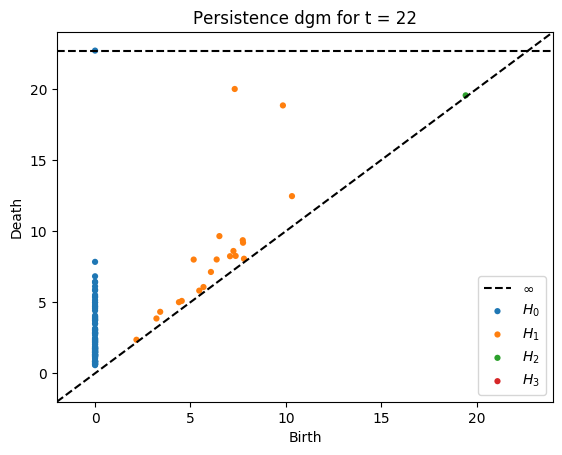

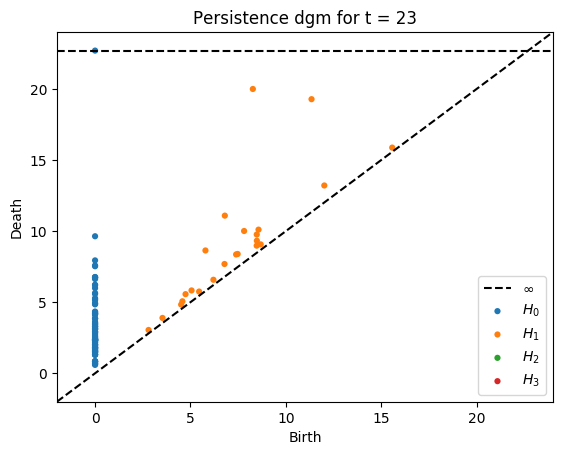

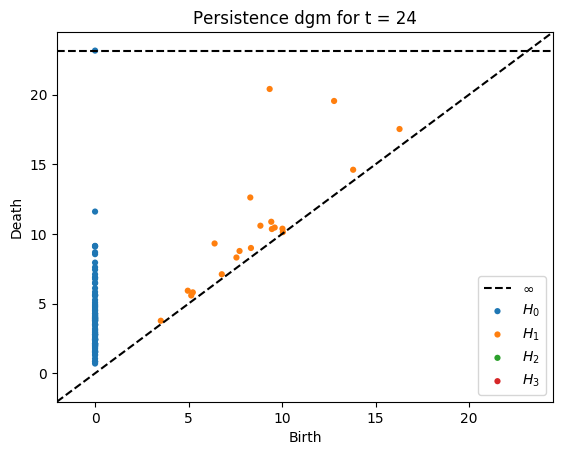

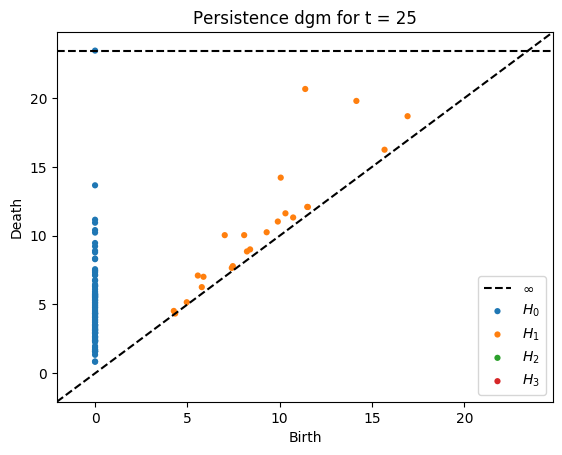

In [107]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

if project == False:
    for i in range(t2s.bifilt.shape[0]):
        dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=3)['dgms']
        plt.clf()
        plt.title('Persistence dgm for t = '+ str(i+1))
        plot_diagrams(dgms, show = True)

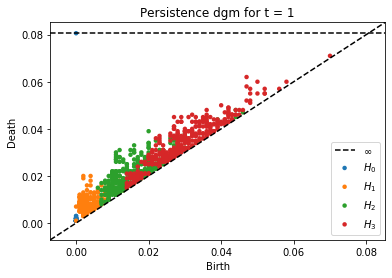

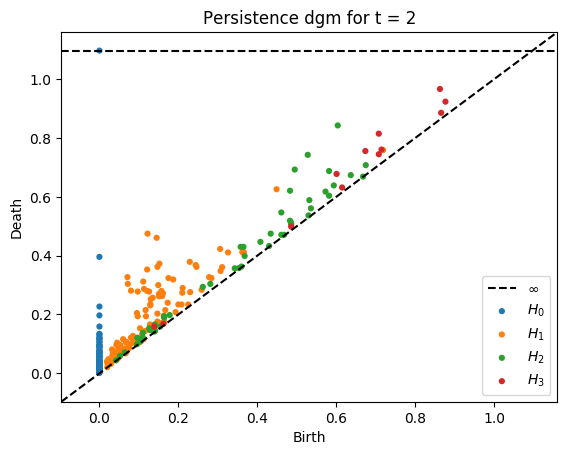

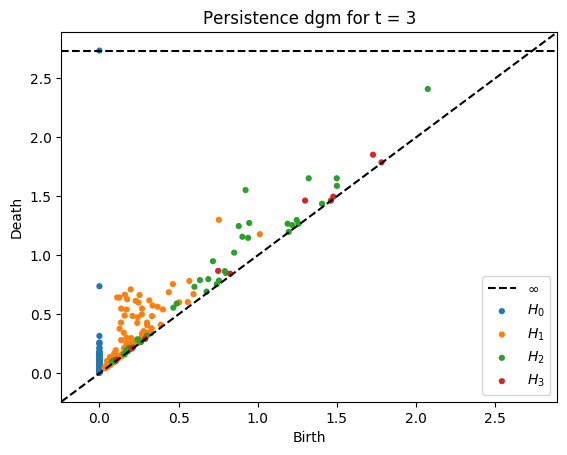

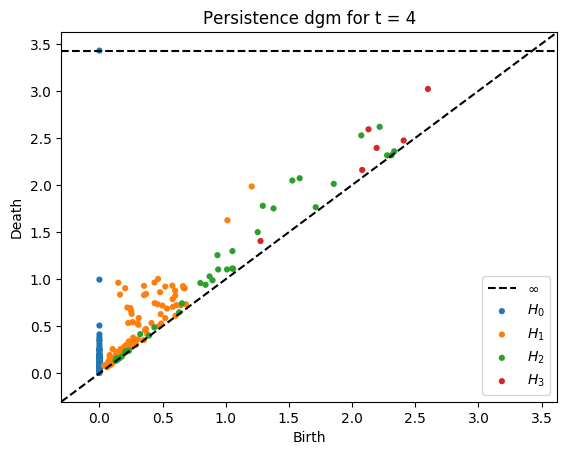

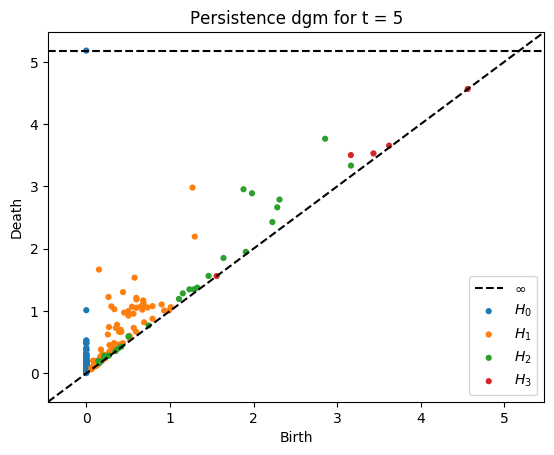

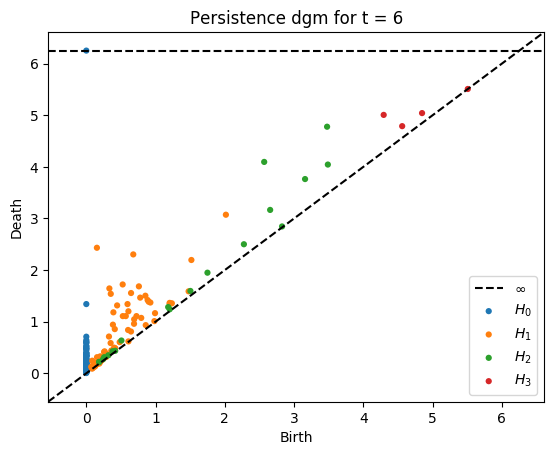

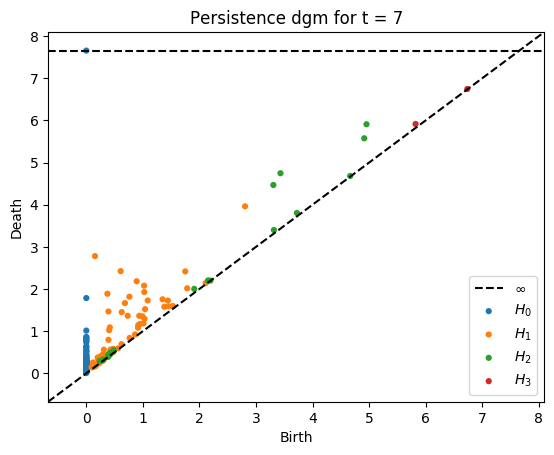

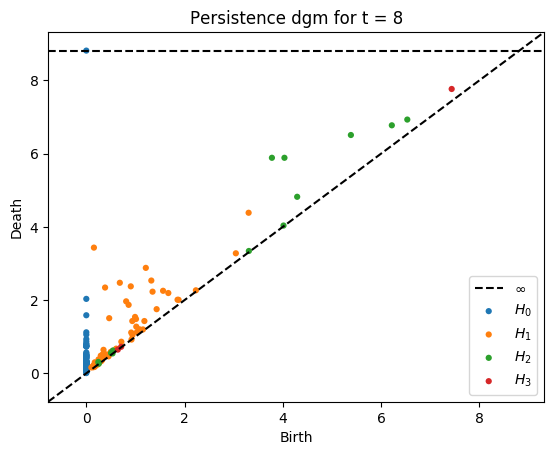

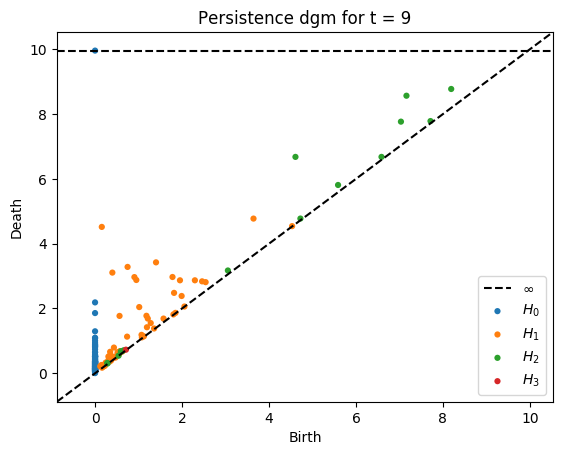

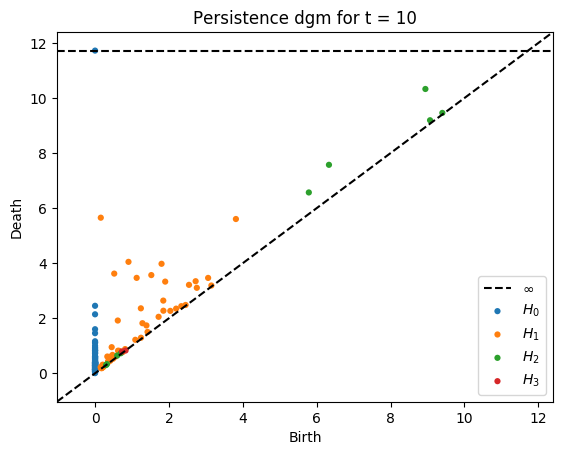

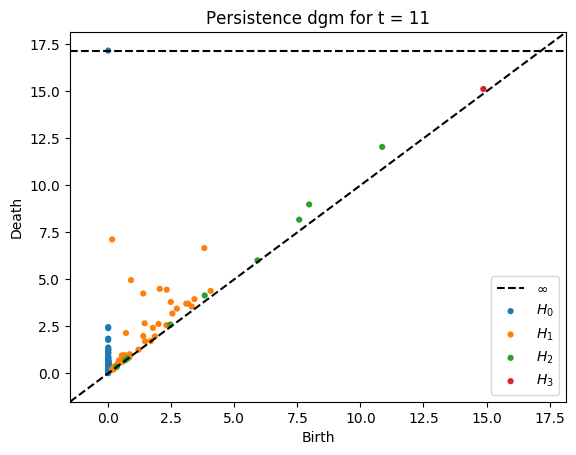

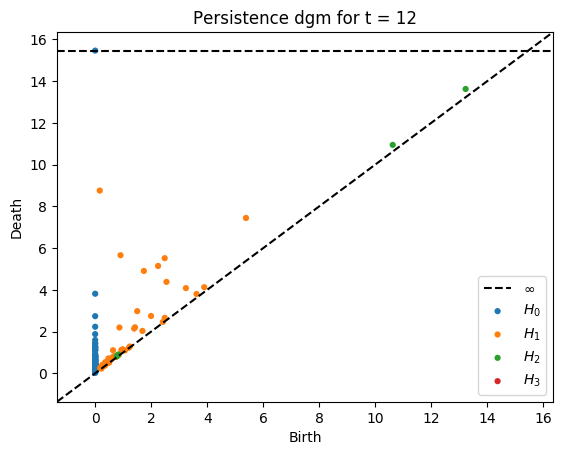

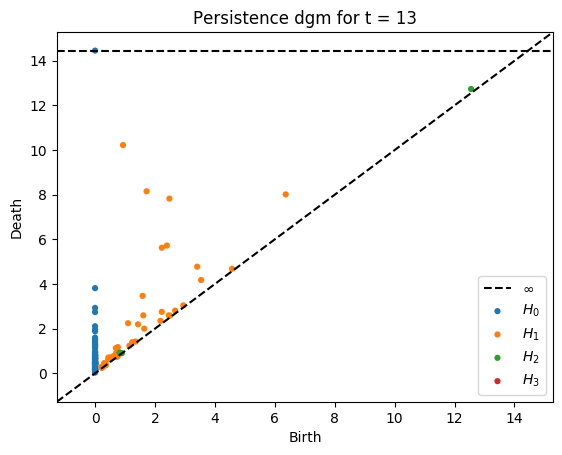

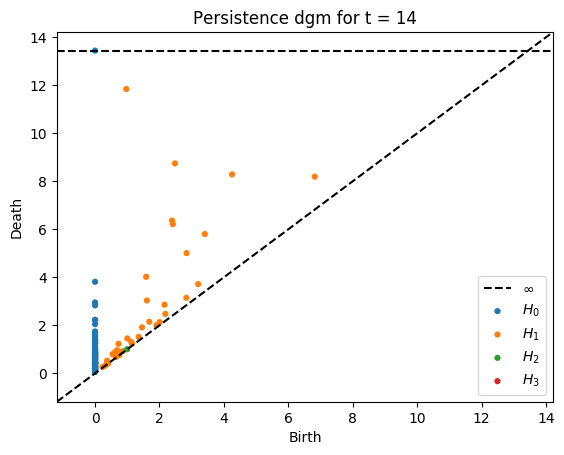

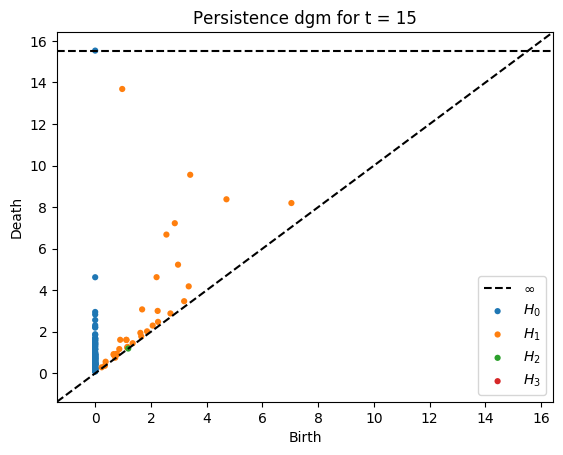

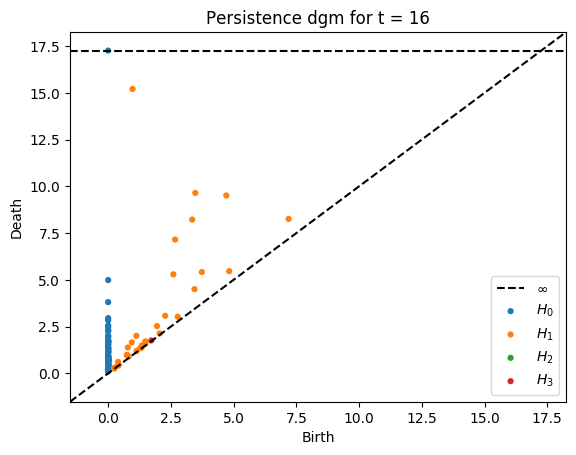

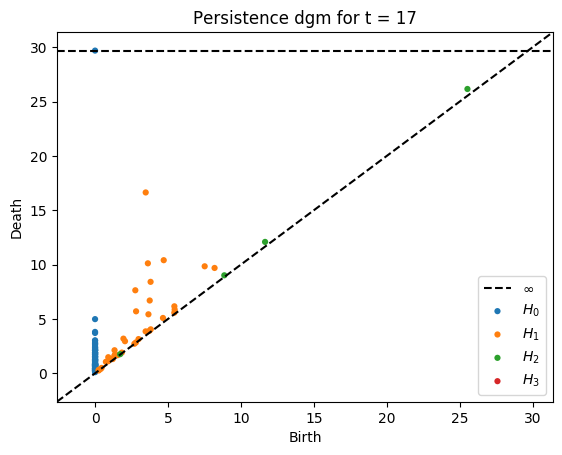

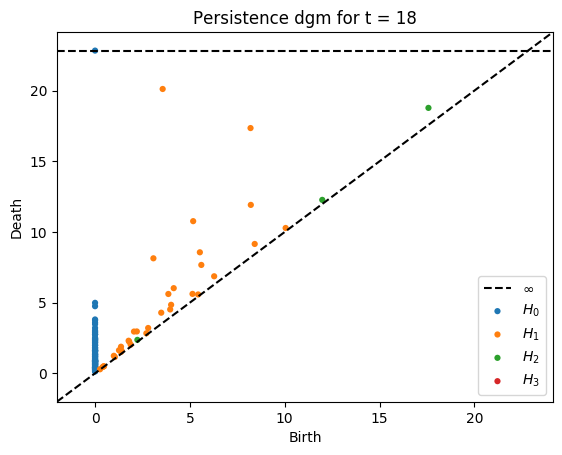

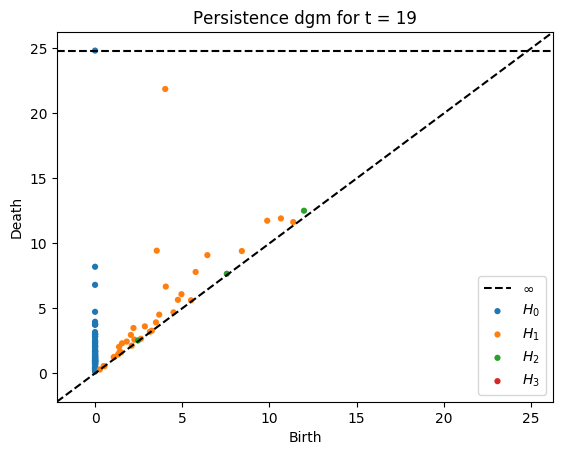

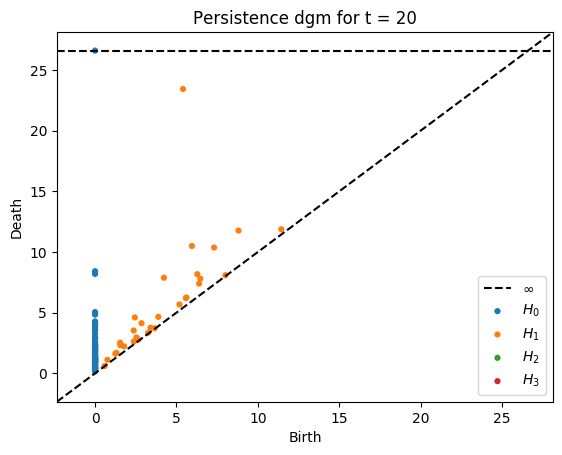

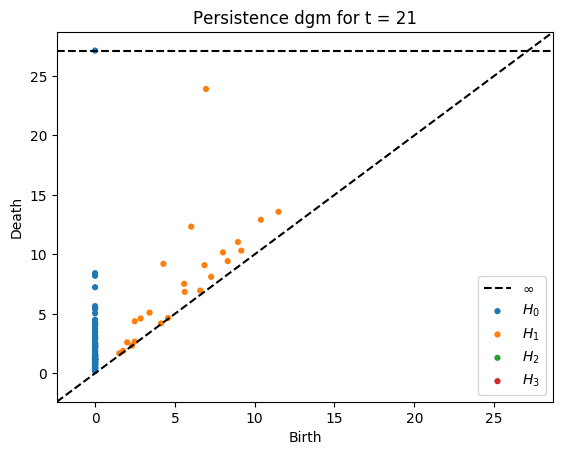

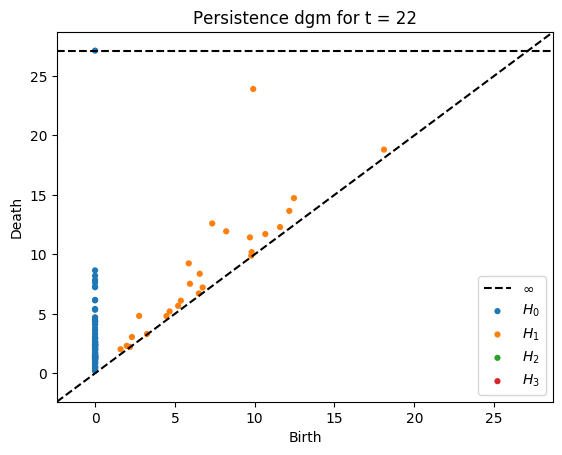

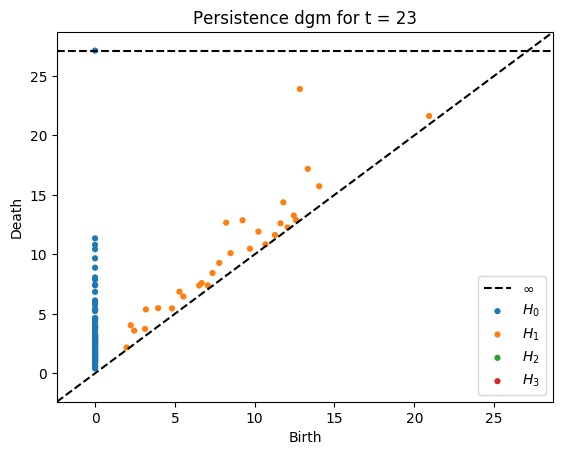

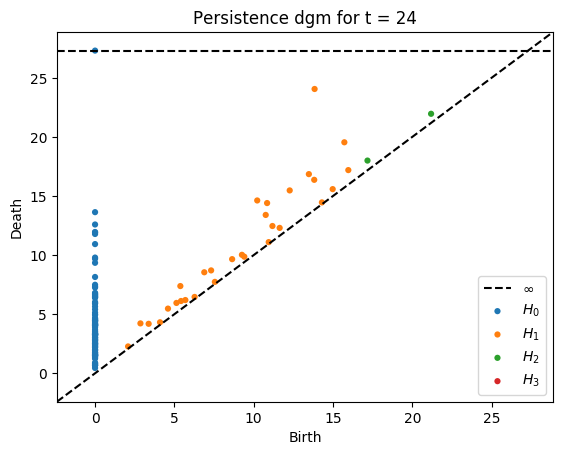

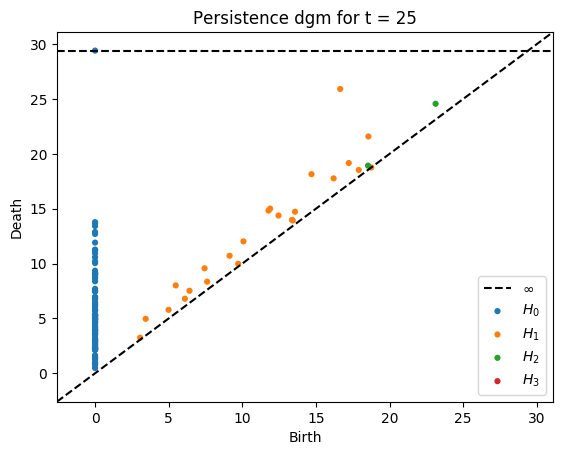

In [13]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

if project == True:
    for i in range(t2s.bifilt.shape[0]):
        dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=3)['dgms']
        plt.clf()
        plt.title('Persistence dgm for t = '+ str(i+1))
        plot_diagrams(dgms, show = True)